**Thinkful - Drill 2.4.3 - Assumptions of Linear Regression**

In [47]:
import math
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from IPython.display import display
from matplotlib import pyplot as plt

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

# Acquire, load, and preview the data.
data = pd.read_csv('Advertising.csv')
display(df.head())

# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1, 1)
X = data[['TV','Radio','Newspaper']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['Sales']

# Calculate the error, also called the residual.
residual = actual - predicted

data['Predicted'] = pd.Series(predicted, index=data.index)
data['Residual'] = pd.Series(residual, index=data.index)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.100,37.800,69.200,22.100
1,2,44.500,39.300,45.100,10.400
2,3,17.200,45.900,69.300,9.300
3,4,151.500,41.300,58.500,18.500
4,5,180.800,10.800,58.400,12.900



Coefficients: 
 [[ 0.04576465  0.18853002 -0.00103749]]

Intercept: 
 [ 2.93888937]

R-squared:
0.897210638179


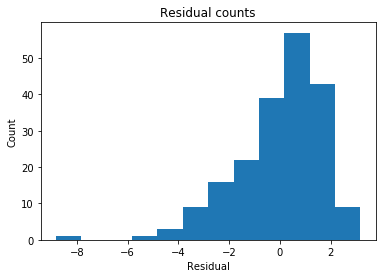

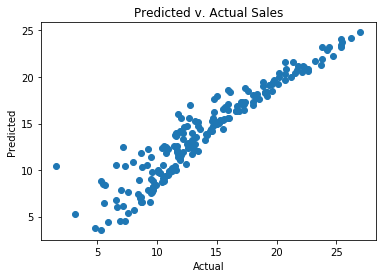

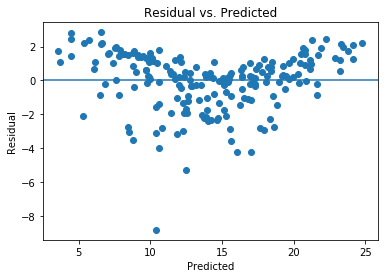

,TV,Radio,Newspaper
TV,1.000,0.055,0.057
Radio,0.055,1.000,0.354
Newspaper,0.057,0.354,1.000


,Unnamed: 0,TV,Radio,Newspaper,Sales,Predicted,Residual
130,131,0.700,39.600,8.700,1.600,10.428,-8.828
5,6,8.700,48.900,75.000,7.200,12.478,-5.278
178,179,276.700,2.300,23.700,11.800,16.011,-4.211
35,36,290.700,4.100,8.500,12.800,17.007,-4.207
126,127,7.800,38.900,50.600,6.600,10.577,-3.977
25,26,262.900,3.500,19.500,12.000,15.610,-3.610
78,79,5.400,29.900,9.400,5.300,8.813,-3.513
75,76,16.900,43.700,89.400,8.700,11.858,-3.158
158,159,11.700,36.900,45.200,7.300,10.384,-3.084
56,57,7.300,28.100,41.400,5.500,8.528,-3.028


In [48]:
# This looks a bit concerning.
binwidth = 1
plt.hist(residual, bins=np.arange(min(residual), max(residual) + binwidth, binwidth))
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

plt.scatter(data['Sales'], predicted)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted v. Actual Sales')
plt.show()

plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

correlation_matrix = X.corr()
display(correlation_matrix)

data.sort_values('Residual', ascending=True).head(20)

**Evaluating Linearity**

From the plots below, we can see that:
* TV vs. sales: the relationship appears to be quadratic, not linear
* Radio vs. sales: the relationship may be linear, but there appears to be more variance for higher radio values
* Newspaper vs. sales: there appears to be little to no relationship (this is confirmed by the fact that the coefficient is close to 0)

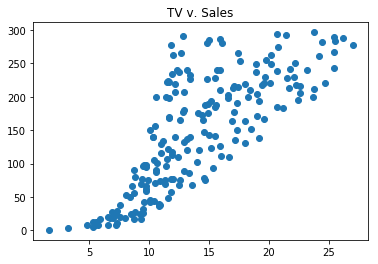

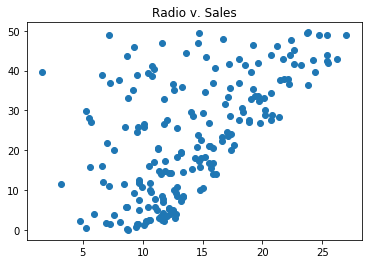

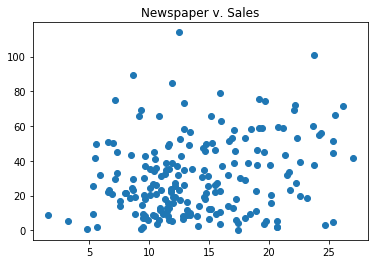

In [4]:
plt.scatter(data['Sales'], data['TV'])
plt.title('TV v. Sales')
plt.show()

plt.scatter(data['Sales'], data['Radio'])
plt.title('Radio v. Sales')
plt.show()

plt.scatter(data['Sales'], data['Newspaper'])
plt.title('Newspaper v. Sales')
plt.show()

**Addressing Non-linearity and Outliers**

It appears that non-linearity and major outliers are contributing to the heteroscedacity and multivariate non-normality. To address this, I modified the following features:
* TV: non-linear and therefore replaced with new feature, sqrt(TV)
* Radio: created a categorical variable which sorts data based on whether the radio sales are high, low or in-between
* Newspaper: no relationship with sales and therefore removed from independent variables
* Low Sales: created categorical for exceptionally low sales

The tradeoffs are that while the residuals are now normally distributed, overfitting may be a concern, as the R-squared value increased from 0.89 to 0.93. 

In [80]:
#Create variable for sales category
Low_Sales = []
for i in range(len(actual)):
    if data['Sales'][i]<4:
        Low_Sales.append(1)
    else:
        Low_Sales.append(0)
data['Low Sales'] = pd.Series(Low_Sales, index=data.index)

High_Radio = []
for i in range(len(actual)):
    if data['Radio'][i]<5:
        High_Radio.append(0)
    elif data['Radio'][i]<38:
        High_Radio.append(1)
    else:
        High_Radio.append(2)
data['High Radio'] = pd.Series(High_Radio, index=data.index)

sqrt_TV = [math.sqrt(x) for x in data['TV']]
data['SQRT TV'] = pd.Series(sqrt_TV, index=data.index)

# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1, 1)
X = data[['SQRT TV','Radio','Low Sales','High Radio']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['Sales']

# Calculate the error, also called the residual.
residual = actual - predicted

data['Predicted'] = pd.Series(predicted, index=data.index)
data['Residual'] = pd.Series(residual, index=data.index)

correlation_matrix = X.corr()
display(correlation_matrix)

data.sort_values('Residual', ascending=True).head(10)


Coefficients: 
 [[ 0.96001521  0.19237273 -2.55652859  0.07361094]]

Intercept: 
 [-1.45217427]

R-squared:
0.931172215453


,SQRT TV,Radio,Low Sales,High Radio
SQRT TV,1.000,0.029,-0.243,0.009
Radio,0.029,1.000,0.016,0.843
Low Sales,-0.243,0.016,1.000,0.073
High Radio,0.009,0.843,0.073,1.000


,Unnamed: 0,TV,Radio,Newspaper,Sales,Predicted,Residual,High Radio,SQRT TV,Low Sales,High TV
5,6,8.700,48.900,75.000,7.200,10.934,-3.734,2,2.950,0,0
178,179,276.700,2.300,23.700,11.800,14.959,-3.159,0,16.634,0,1
130,131,0.700,39.600,8.700,1.600,4.560,-2.960,2,0.837,1,0
35,36,290.700,4.100,8.500,12.800,15.705,-2.905,0,17.050,0,1
135,136,48.300,47.000,8.500,11.600,14.408,-2.808,2,6.950,0,0
25,26,262.900,3.500,19.500,12.000,14.787,-2.787,0,16.214,0,1
75,76,16.900,43.700,89.400,8.700,11.048,-2.348,2,4.111,0,0
126,127,7.800,38.900,50.600,6.600,8.860,-2.260,2,2.793,0,0
1,2,44.500,39.300,45.100,10.400,12.659,-2.259,2,6.671,0,0
2,3,17.200,45.900,69.300,9.300,11.506,-2.206,2,4.147,0,0


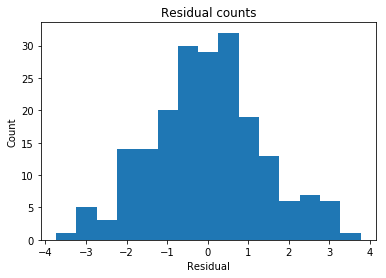

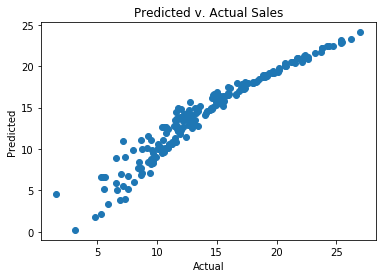

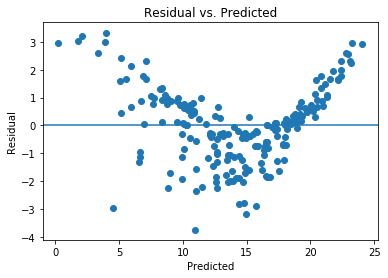

In [81]:
# This looks a bit concerning.
binwidth = 0.5
plt.hist(residual, bins=np.arange(min(residual), max(residual) + binwidth, binwidth))
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

plt.scatter(data['Sales'], predicted)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted v. Actual Sales')
plt.show()

plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()